In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [55]:
data= pd.read_csv('Restaurant_Reviews.tsv', quoting=3, delimiter='\t')
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [56]:
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer

In [57]:
lst = []
ps = PorterStemmer()
for i in range(0,1000):
    #removing the numeric and other symbolic character and store them in a lst
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i]).lower().split()
    review = [ ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = " ".join(review)
    lst.append(review)


In [58]:
for i in range(5):
    print(lst[i])

wow love place
crust good
tasti textur nasti
stop late may bank holiday rick steve recommend love
select menu great price


In [59]:
#creating the bag of words model
#through the process of tokenization

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
cv = CountVectorizer(max_features = 1500) #taking only 1500 most significant words

In [63]:
X = cv.fit_transform(lst).toarray() 
#sparse matrix
#toarray -> to concert into a matrix

In [62]:
y = data.iloc[:,1].values

In [64]:
#naive bais 
x = X.copy()
Y = y.copy()

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(x,Y,test_size = 0.25, random_state =0)

# RandomForest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:

for i in np.arange(31,41,2):
    classifier = RandomForestClassifier(n_estimators=i, random_state=0)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    cf = confusion_matrix(y_test,y_pred)
    print(cf)
    print()


[[101  16]
 [ 59  74]]

[[101  16]
 [ 59  74]]

[[100  17]
 [ 59  74]]

[[100  17]
 [ 59  74]]

[[100  17]
 [ 59  74]]



In [70]:
#by experimenting with the n_estimators the best one is found at 31
# giving the best result.

In [71]:
classifier = RandomForestClassifier(n_estimators=31, random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cf = confusion_matrix(y_test,y_pred,)
print(cf)


[[101  16]
 [ 59  74]]


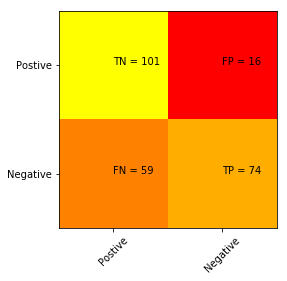

In [72]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cf, interpolation='nearest', cmap=plt.cm.autumn)
classNames = ['Postive','Negative']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cf[i][j]))
plt.show()

#### Accuracy - How often it is true?

In [73]:
print((101+74)/250*100)

70.0


In [74]:
from sklearn.metrics import recall_score,precision_score,f1_score

#### Precision - when it predicted positive, how often is correct### 

In [75]:
prec = precision_score(y_test,y_pred)
prec*100

82.22222222222221

#### Recall - when it actually positive, how often does it predict positive


In [76]:
recall = recall_score(y_test,y_pred)
recall*100

55.639097744360896

In [77]:
f1 = f1_score(y_test,y_pred)
f1*100

66.3677130044843

# Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
cf = GaussianNB()
cf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [80]:
y_pred = cf.predict(X_test)

In [81]:
cf2 = confusion_matrix(y_test,y_pred)

In [82]:
cf2

array([[ 67,  50],
       [ 20, 113]], dtype=int64)

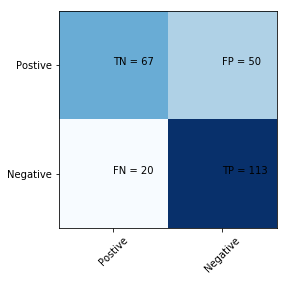

In [83]:

plt.clf()
plt.imshow(cf2, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Postive','Negative']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cf2[i][j]))
plt.show()

#### Accuracy - How often it is true?

In [84]:
print((113+67)/250*100)

72.0


### Precision - when it predicted positive, how often is correct

In [85]:
prec = precision_score(y_test,y_pred)
prec*100

69.32515337423312

### Recall - when it actually positive, how often does it predict positive


In [86]:
recall = recall_score(y_test,y_pred)
recall*100

84.9624060150376

In [87]:
f1 = f1_score(y_test,y_pred)
f1*100

76.35135135135135